# Mô tả các Nhóm Đặc Trưng Luồng Mạng (Network Flow Features)

## Nhóm 1: Thông tin cơ bản về luồng mạng (Network Flow Information)
- **id.orig_p**: Cổng nguồn (source port) của luồng mạng.  
- **id.resp_p**: Cổng đích (destination port) của luồng mạng.  
- **proto**: Giao thức mạng được sử dụng (ví dụ: TCP, UDP).  
- **service**: Dịch vụ liên quan đến luồng mạng (ví dụ: MQTT, HTTP, hoặc "-").  
- **flow_duration**: Thời gian tồn tại của luồng mạng (tính bằng giây).  

## Nhóm 2: Thống kê gói tin (Packet Statistics)
- **fwd_pkts_tot**: Tổng số gói tin từ nguồn đến đích (forward).  
- **bwd_pkts_tot**: Tổng số gói tin từ đích đến nguồn (backward).  
- **fwd_data_pkts_tot**: Gói tin chứa dữ liệu từ nguồn đến đích.  
- **bwd_data_pkts_tot**: Gói tin chứa dữ liệu từ đích đến nguồn.  
- **fwd_pkts_per_sec**: Tốc độ forward packets mỗi giây.  
- **bwd_pkts_per_sec**: Tốc độ backward packets mỗi giây.  
- **flow_pkts_per_sec**: Tổng tốc độ gói tin mỗi giây.  
- **down_up_ratio**: Tỷ lệ giữa gói tin backward và forward.  

## Nhóm 3: Kích thước tiêu đề gói tin (Header Size Statistics)
- **fwd_header_size_tot**, **min**, **max**: Tổng, nhỏ nhất, lớn nhất kích thước tiêu đề gói forward.  
- **bwd_header_size_tot**, **min**, **max**: Tổng, nhỏ nhất, lớn nhất kích thước tiêu đề gói backward.  

## Nhóm 4: Cờ TCP (TCP Flags)
- **flow_FIN_flag_count**, **SYN**, **RST**, **ACK**, **CWR**, **ECE**: Số lần xuất hiện các cờ FIN, SYN, RST, ACK, CWR, ECE trong toàn bộ luồng.  
- **fwd_PSH_flag_count**, **fwd_URG_flag_count**: Số lần xuất hiện cờ PSH, URG trong forward packets.  
- **bwd_PSH_flag_count**, **bwd_URG_flag_count**: Số lần xuất hiện cờ PSH, URG trong backward packets.  

## Nhóm 5: Thống kê tải trọng gói tin (Payload Statistics)
- **fwd_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng gói tin forward.  
- **bwd_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng gói tin backward.  
- **flow_pkts_payload** (min, max, tot, avg, std): Kích thước tải trọng toàn bộ luồng.  

## Nhóm 6: Thống kê thời gian giữa các gói tin (Inter-Arrival Time Statistics)
- **fwd_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin forward.  
- **bwd_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin backward.  
- **flow_iat** (min, max, tot, avg, std): Thống kê thời gian giữa các gói tin bất kỳ.  

## Nhóm 7: Thống kê luồng phụ (Subflow Statistics)
- **fwd_subflow_pkts**, **bwd_subflow_pkts**: Số gói tin trung bình mỗi subflow forward/backward.  
- **fwd_subflow_bytes**, **bwd_subflow_bytes**: Số byte trung bình mỗi subflow forward/backward.  

## Nhóm 8: Thống kê khối dữ liệu (Bulk Statistics)
- **fwd_bulk_bytes**, **fwd_bulk_packets**, **fwd_bulk_rate**: Tổng byte, gói tin, tốc độ khối dữ liệu forward.  
- **bwd_bulk_bytes**, **bwd_bulk_packets**, **bwd_bulk_rate**: Tổng byte, gói tin, tốc độ khối dữ liệu backward.  

## Nhóm 9: Thống kê thời gian hoạt động và nhàn rỗi (Active/Idle Statistics)
- **active** (min, max, tot, avg, std): Thời gian hoạt động của luồng.  
- **idle** (min, max, tot, avg, std): Thời gian nhàn rỗi của luồng.  

## Nhóm 10: Kích thước cửa sổ TCP (TCP Window Size)
- **fwd_init_window_size**, **bwd_init_window_size**: Kích thước cửa sổ ban đầu của gói forward/backward.  
- **fwd_last_window_size**: Kích thước cửa sổ cuối cùng của gói forward.  

## Nhóm 11: Nhãn tấn công (Attack Label)
- **Attack_type**: Loại tấn công mạng hoặc hành vi của luồng (ví dụ: `MQTT_Publish`, `DOS_SYN_Hping`).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

In [2]:
print(data['Attack_type'])
X = data.drop('Attack_type', axis=1)
y = data['Attack_type'] 

0                MQTT_Publish
1                MQTT_Publish
2                MQTT_Publish
3                MQTT_Publish
4                MQTT_Publish
                 ...         
123112    NMAP_XMAS_TREE_SCAN
123113    NMAP_XMAS_TREE_SCAN
123114    NMAP_XMAS_TREE_SCAN
123115    NMAP_XMAS_TREE_SCAN
123116    NMAP_XMAS_TREE_SCAN
Name: Attack_type, Length: 123117, dtype: object


In [3]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [ ]:
data = Preprocessing.delete_columns(data, ['service'])
data = Preprocessing.one_hot_encode(data, ['proto'])

In [5]:
Preprocessing.apply_smote(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: could not convert string to float: 'tcp'

In [ ]:
# df = data
# # Chọn các cột số
# numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# # Kiểm tra giá trị inf
# inf_counts = df[numeric_columns].apply(lambda x: np.isinf(x)).sum()
# print("Số lượng giá trị inf trong mỗi cột:")
# print(inf_counts[inf_counts > 0])  # Chỉ hiển thị các cột có giá trị inf

In [ ]:
#kiểm tra nhãn dạng categorycal
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(f"Các cột categorical: {list(categorical_columns)}")
print(f"Số lượng cột categorical: {len(categorical_columns)}")
for col in categorical_columns:
    print(f"\nCột '{col}':")
    print(f"Giá trị duy nhất: {data[col].unique()}")
    print(f"Số lượng giá trị duy nhất: {data[col].nunique()}")
#kiểm tra số lượng '-'.
print(data['service'].value_counts()) # có ther

Các cột categorical: ['proto', 'service', 'Attack_type']
Số lượng cột categorical: 3

Cột 'proto':
Giá trị duy nhất: ['tcp' 'udp' 'icmp']
Số lượng giá trị duy nhất: 3

Cột 'service':
Giá trị duy nhất: ['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']
Số lượng giá trị duy nhất: 10

Cột 'Attack_type':
Giá trị duy nhất: ['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']
Số lượng giá trị duy nhất: 12
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64


In [ ]:
#Kiểm tra giá trị null nào không?

In [ ]:
#drop cột service
data.drop(columns=['service'], inplace=True)

In [ ]:
# one-hot encoding cho cột categorical
from sklearn.preprocessing import OneHotEncoder

# 2. Tạo ví dụ DataFrame
df  = data

# 3. Xác định cột cần one-hot encode
categorical_cols = ['proto']

# 4. Khởi tạo OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# 5. Fit và transform dữ liệu
encoded_array = encoder.fit_transform(df[categorical_cols])

# 6. Lấy tên cột mới sau khi encode
encoded_col_names = encoder.get_feature_names_out(categorical_cols)

# 7. Tạo DataFrame từ mảng đã encode
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

# 8. Bỏ các cột cũ & ghép với cột encode mới
df_encoded = pd.concat([
    df.drop(columns=categorical_cols).reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

# 9. In kết quả
data = df_encoded

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def label_encode_column(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Cột '{column_name}' không tồn tại trong DataFrame")
    
    encoder = LabelEncoder()
    
    df[column_name] = encoder.fit_transform(df[column_name])
    
    return df, encoder
data, encoder = label_encode_column(data, 'Attack_type')
print(encoder.classes_)


['ARP_poisioning' 'DDOS_Slowloris' 'DOS_SYN_Hping' 'MQTT_Publish'
 'Metasploit_Brute_Force_SSH' 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION'
 'NMAP_TCP_scan' 'NMAP_UDP_SCAN' 'NMAP_XMAS_TREE_SCAN' 'Thing_Speak'
 'Wipro_bulb']


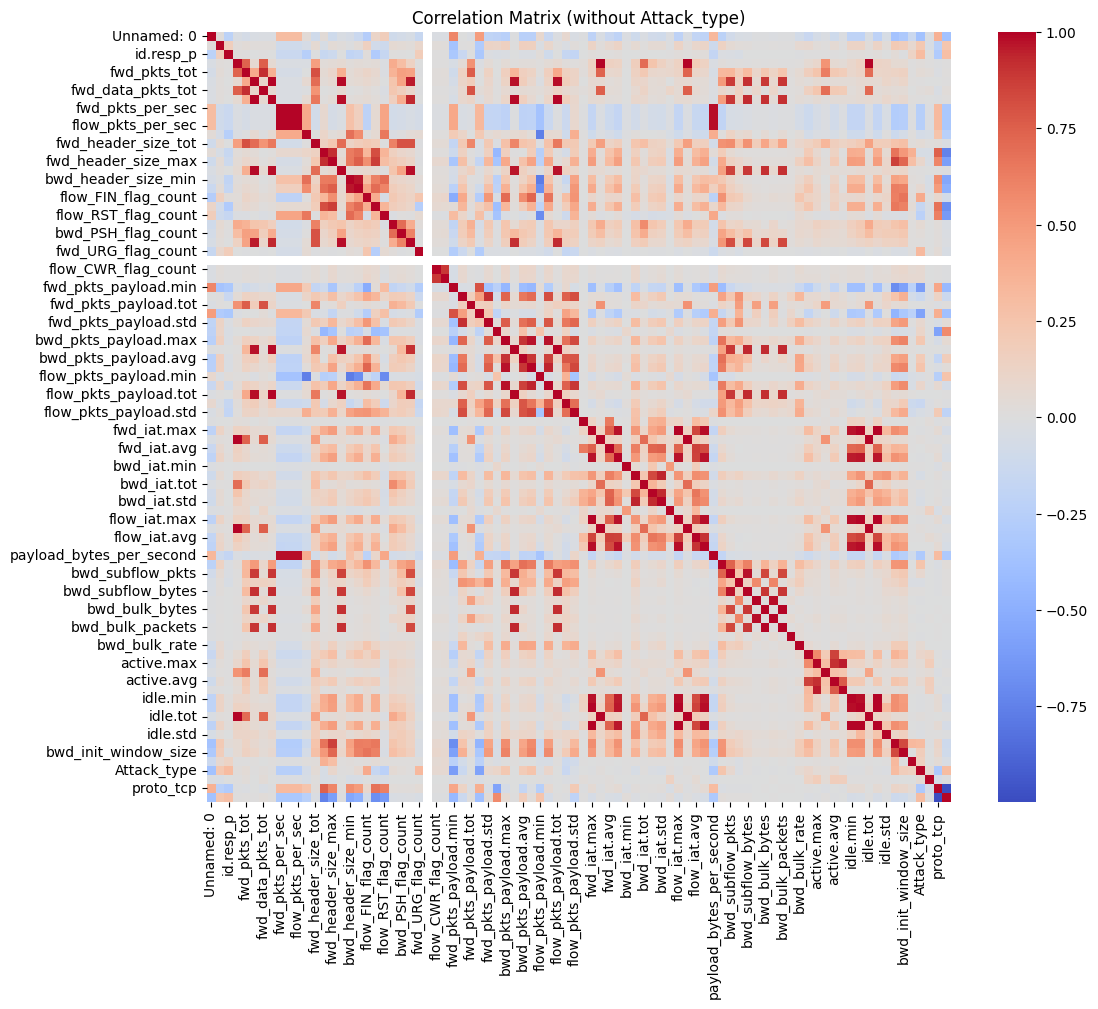

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tính ma trận tương quan
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (without Attack_type)")
plt.show()


In [ ]:
import pandas as pd
def remove_highly_correlated_columns(df, threshold=0.8, target_column=None):
    # Tính ma trận tương quan
    corr_matrix = df.corr().abs()  # Lấy giá trị tuyệt đối để xem xét cả tương quan âm
    
    # Tạo một tập để lưu các cột cần loại bỏ
    to_drop = set()
    
    # Duyệt qua ma trận tương quan
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold:
                colname_i = corr_matrix.columns[i]
                colname_j = corr_matrix.columns[j]
                
                # Không loại bỏ cột mục tiêu
                if target_column and (colname_i == target_column or colname_j == target_column):
                    continue
                
                # Loại bỏ cột có tổng tương quan lớn hơn với các cột khác
                if colname_j not in to_drop:
                    to_drop.add(colname_j)
    
    # Loại bỏ các cột
    df_reduced = df.drop(columns=to_drop)
    dropped_columns = list(to_drop)
    
    print(f"Các cột bị loại bỏ: {dropped_columns}")
    
    return df_reduced, dropped_columns
df_reduced, dropped_columns = remove_highly_correlated_columns(data, threshold=0.8, target_column='attack_type')
    
print("\nDataFrame sau khi loại bỏ:")
print(df_reduced)
print("\nDanh sách các cột bị loại bỏ:")
print(dropped_columns)


Các cột bị loại bỏ: ['bwd_bulk_bytes', 'fwd_header_size_tot', 'bwd_iat.std', 'flow_SYN_flag_count', 'flow_iat.avg', 'idle.avg', 'flow_iat.tot', 'idle.tot', 'bwd_subflow_bytes', 'flow_pkts_payload.std', 'flow_ACK_flag_count', 'bwd_init_window_size', 'flow_iat.max', 'flow_pkts_per_sec', 'bwd_pkts_payload.avg', 'active.avg', 'fwd_bulk_packets', 'active.std', 'bwd_bulk_packets', 'fwd_iat.tot', 'payload_bytes_per_second', 'bwd_pkts_per_sec', 'flow_ECE_flag_count', 'flow_pkts_payload.tot', 'bwd_header_size_tot', 'fwd_init_window_size', 'fwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'fwd_iat.std', 'bwd_PSH_flag_count', 'bwd_header_size_max', 'fwd_header_size_max', 'fwd_pkts_payload.std', 'bwd_subflow_pkts', 'bwd_pkts_payload.tot', 'idle.max', 'proto_udp', 'bwd_data_pkts_tot', 'flow_iat.std', 'idle.min', 'flow_pkts_payload.max', 'bwd_iat.avg', 'fwd_data_pkts_tot']

DataFrame sau khi loại bỏ:
        Unnamed: 0  id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  \
0                0      38667

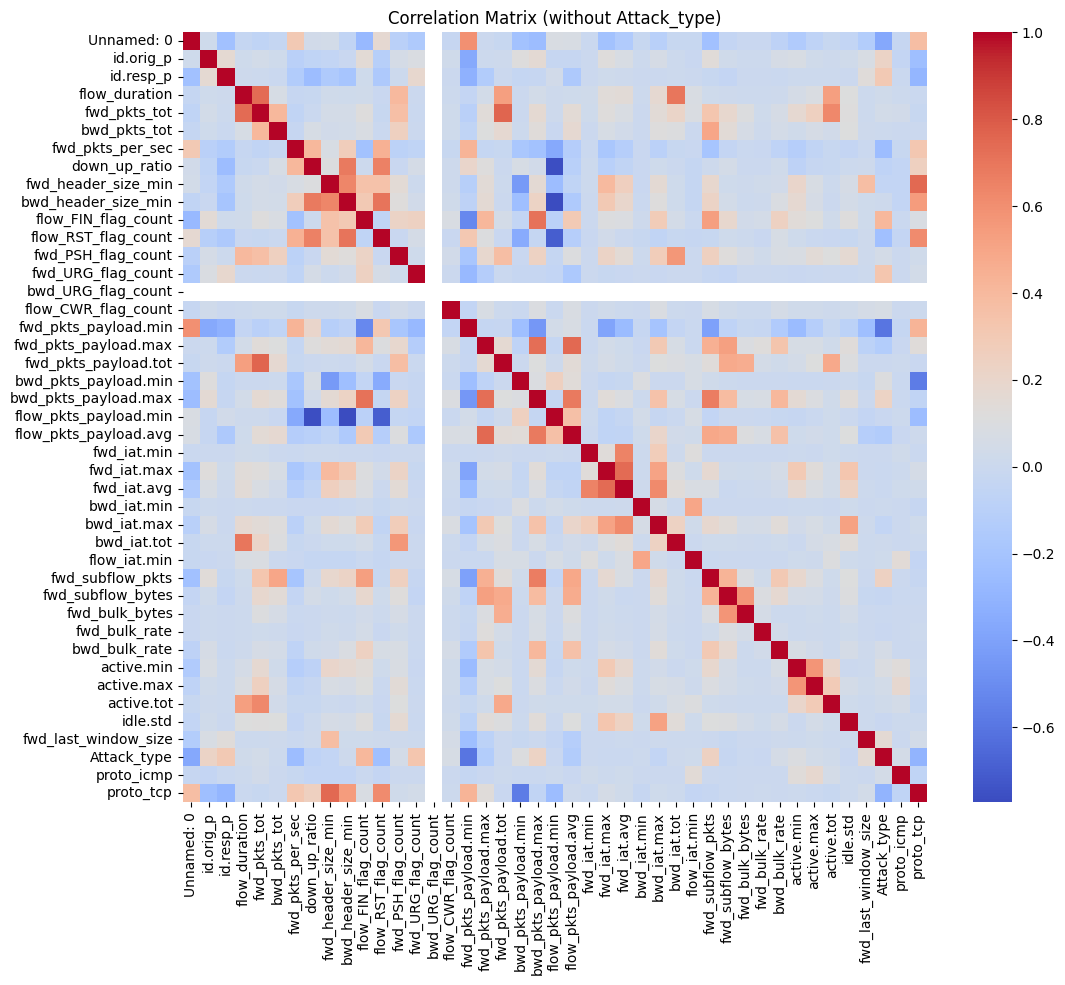

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tính ma trận tương quan
corr_matrix = df_reduced.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (without Attack_type)")
plt.show()

Attack_type
2     94659
10     8108
0      7750
3      4146
8      2590
9      2010
6      2000
7      1002
1       534
11      253
4        37
5        28
Name: count, dtype: int64


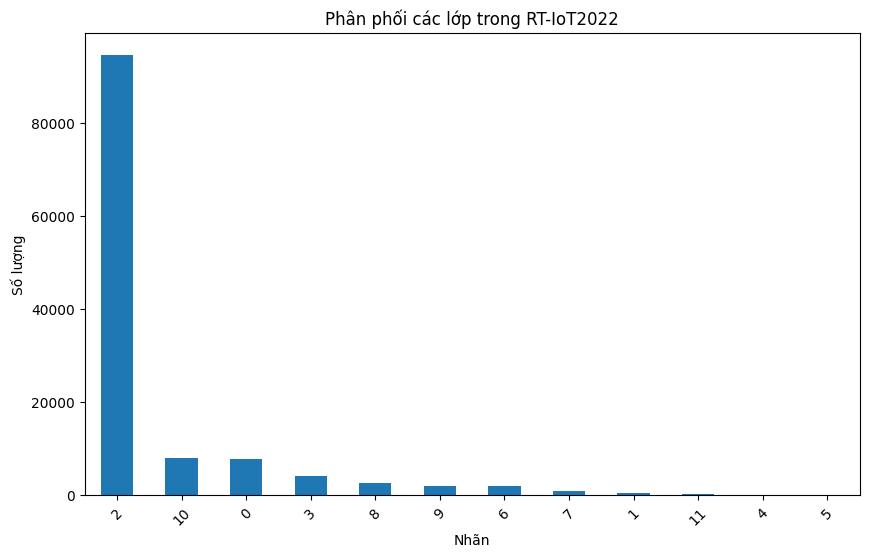

In [ ]:
# Vẽ biểu đồ phân phối nhãn
plt.figure(figsize=(10, 6))
print(data['Attack_type'].value_counts())
data['Attack_type'].value_counts().plot(kind='bar')
plt.title('Phân phối các lớp trong RT-IoT2022')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Kiểm tra giá trị thiếu
print("\nGiá trị thiếu:")
print(data.isnull().sum())


Giá trị thiếu:
Unnamed: 0              0
id.orig_p               0
id.resp_p               0
flow_duration           0
fwd_pkts_tot            0
                       ..
fwd_last_window_size    0
Attack_type             0
proto_icmp              0
proto_tcp               0
proto_udp               0
Length: 86, dtype: int64


In [ ]:
# 2. Xử lý dữ liệu
# 2.1. Xử lý giá trị thiếu
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
print("\nGiá trị thiếu sau khi xử lý:")
print(data.isnull().sum())

# 2.2. Chuẩn hóa đặc trưng
X = data.drop('Attack_type', axis=1)
y = data['Attack_type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


Giá trị thiếu sau khi xử lý:
Unnamed: 0              0
id.orig_p               0
id.resp_p               0
flow_duration           0
fwd_pkts_tot            0
                       ..
fwd_last_window_size    0
Attack_type             0
proto_icmp              0
proto_tcp               0
proto_udp               0
Length: 86, dtype: int64


In [ ]:

# # 2.3. Mã hóa nhãn
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)
# print("\nÁnh xạ nhãn:")
# for label, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
#     print(f"{label}: {encoded}")

Cách vẽ histogram feature importance trong Python (với Random Forest)

C:\Users\QUIN\AppData\Local\Temp\ipykernel_5100\2344876139.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


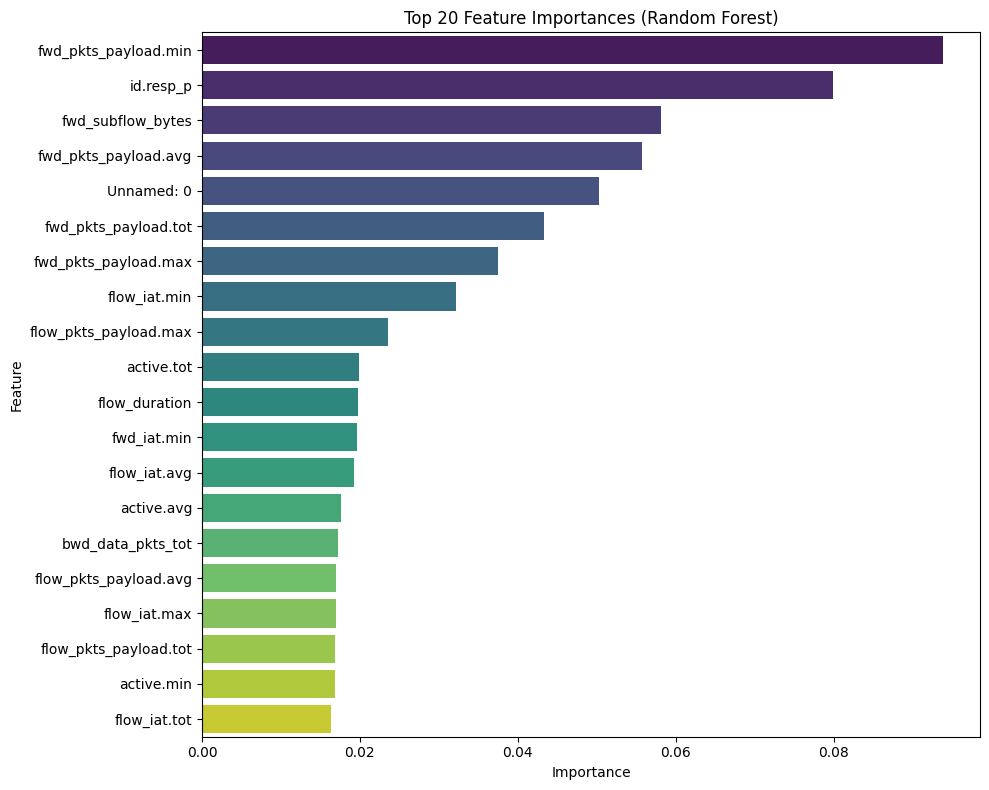

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris


# Train mô hình
model = RandomForestClassifier()
model.fit(X, y)


feature_importance = model.feature_importances_
feature_names = X.columns

# Tạo DataFrame và sắp xếp
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Lấy Top N đặc trưng quan trọng nhất
top_n = 20
top_features = importance_df.head(top_n)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:



# 2.4. Xử lý mất cân bằng lớp
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
print("\nPhân phối nhãn sau khi cân bằng:")
balanced_labels = pd.Series(y_balanced).value_counts()
for label, count in zip(encoder.classes_, balanced_labels):
    print(f"{label}: {count}")

# Vẽ biểu đồ phân phối nhãn sau SMOTE
plt.figure(figsize=(10, 6))
pd.Series(y_balanced).value_counts().plot(kind='bar')
plt.title('Phân phối các lớp sau SMOTE')
plt.xlabel('Nhãn (mã hóa)')
plt.ylabel('Số lượng')
plt.xticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_, rotation=45)
plt.show()

NameError: name 'y_encoded' is not defined

In [ ]:
# 3. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
print("\nKích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)
print("\nPhân phối nhãn trong tập huấn luyện:")
print(pd.Series(y_train).value_counts())
print("\nPhân phối nhãn trong tập kiểm tra:")
print(pd.Series(y_test).value_counts())


Kích thước tập huấn luyện: (908726, 85) (908726,)
Kích thước tập kiểm tra: (227182, 85) (227182,)

Phân phối nhãn trong tập huấn luyện:
10    75728
9     75728
8     75727
6     75727
4     75727
0     75727
11    75727
2     75727
5     75727
7     75727
3     75727
1     75727
Name: count, dtype: int64

Phân phối nhãn trong tập kiểm tra:
8     18932
6     18932
5     18932
0     18932
7     18932
3     18932
2     18932
4     18932
1     18932
11    18932
9     18931
10    18931
Name: count, dtype: int64
